In [1]:
#Load Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./mtcars.csv')
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
#Drop Model Column
data2=data.drop('model',axis=1)
data2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#Show Key Statistics
data2.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
#Create Profile Report
    
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
mtcarsReport = pp.ProfileReport(data2)
mtcarsReport.to_file('mtcarsReport2b.html')
display(IFrame('mtcarsReport2b.html', width=900, height=350))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

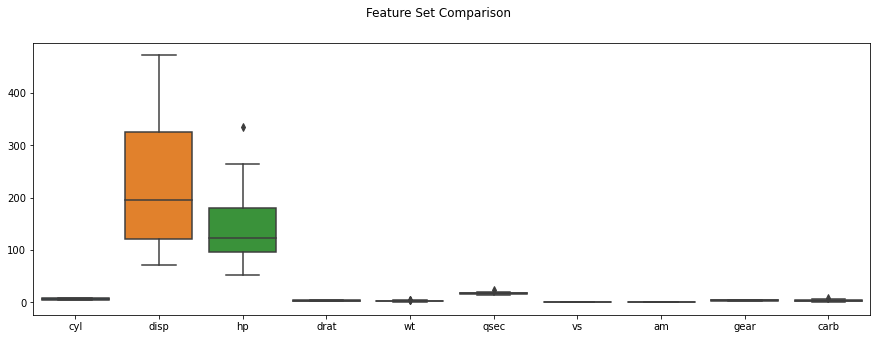

In [5]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=data2.drop('mpg',axis=1))
plt.show()

In [6]:
#Correlation Columns with Output
cor = data2.corr()
cor_target = abs(cor['mpg'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features.sort_values(ascending=False)

mpg     1.000000
wt      0.867659
cyl     0.852162
disp    0.847551
Name: mpg, dtype: float64

In [8]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(data2,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('cyl', 'mpg'), ('disp', 'mpg'), ('disp', 'cyl'), ('hp', 'cyl'), ('wt', 'mpg'), ('wt', 'disp'), ('vs', 'cyl')]


In [9]:
col

[('cyl', 'mpg'),
 ('disp', 'mpg'),
 ('disp', 'cyl'),
 ('hp', 'cyl'),
 ('wt', 'mpg'),
 ('wt', 'disp'),
 ('vs', 'cyl')]

mpg


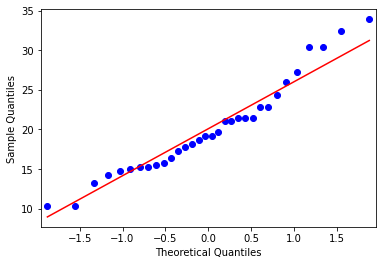

cyl


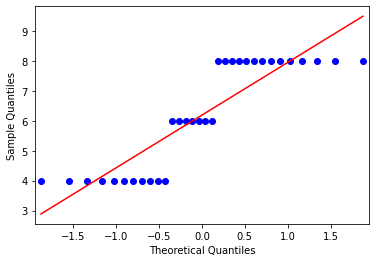

disp


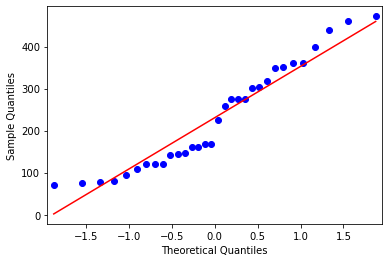

hp


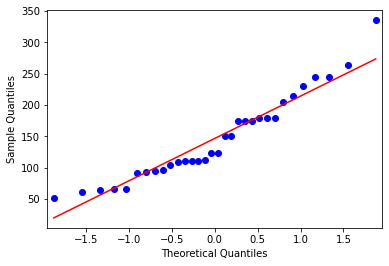

drat


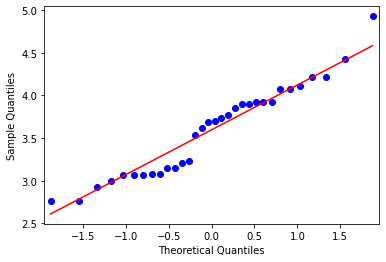

wt


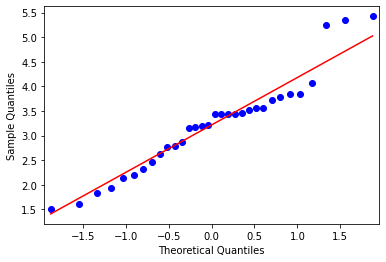

qsec


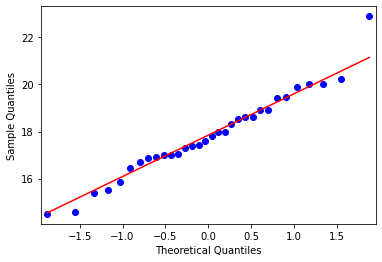

vs


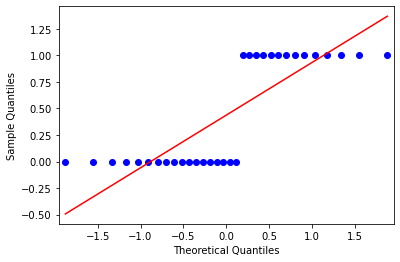

am


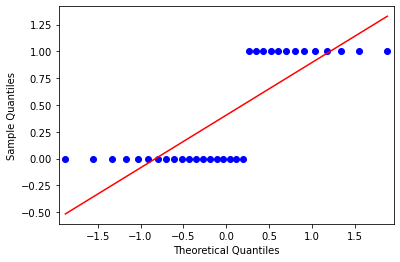

gear


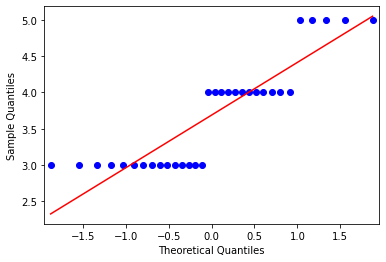

carb


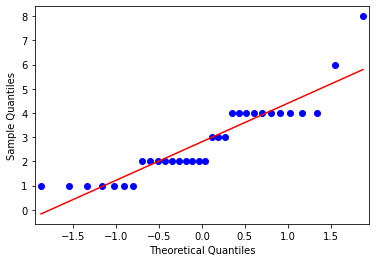

In [10]:
#Create QQ Plots

from statsmodels.graphics.gofplots import qqplot
import pylab

cnt = 1
for col in data2.columns:
    print(col)
    qqplot(data2[col],line='s')
    pylab.show()
    cnt += 1    

In [11]:
#Normality test - Shapiro-Wilk Test

#   p <= alpha(0.05): reject H0, not normal.
#   p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro

cnt = 1
for col in data2.columns:
    print(col)
    stat, p = shapiro(data2[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05  
    if p > alpha:
     print('Sample looks Gaussian (fail to reject H0)')
    else:
     print('Sample does not look Gaussian (reject H0)')
    cnt += 1    

mpg
Statistics=0.948, p=0.123
Sample looks Gaussian (fail to reject H0)
cyl
Statistics=0.753, p=0.000
Sample does not look Gaussian (reject H0)
disp
Statistics=0.920, p=0.021
Sample does not look Gaussian (reject H0)
hp
Statistics=0.933, p=0.049
Sample does not look Gaussian (reject H0)
drat
Statistics=0.946, p=0.110
Sample looks Gaussian (fail to reject H0)
wt
Statistics=0.943, p=0.093
Sample looks Gaussian (fail to reject H0)
qsec
Statistics=0.973, p=0.594
Sample looks Gaussian (fail to reject H0)
vs
Statistics=0.632, p=0.000
Sample does not look Gaussian (reject H0)
am
Statistics=0.625, p=0.000
Sample does not look Gaussian (reject H0)
gear
Statistics=0.773, p=0.000
Sample does not look Gaussian (reject H0)
carb
Statistics=0.851, p=0.000
Sample does not look Gaussian (reject H0)


In [12]:
#Create Standard Model

#Define x and y variable
x = data2.drop('mpg',axis=1).to_numpy()
y = data2['mpg'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Model
from sklearn.linear_model import LinearRegression

In [12]:
#Create Model

from sklearn import metrics

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('\nOriginal Model')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data2.drop('mpg',axis=1).columns,columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Original Model

Method: Linear regression

Intercept: 19.87
      Coefficients
cyl       1.938951
disp      1.080770
hp       -0.310827
drat      1.321747
wt       -2.459684
qsec      1.461972
vs       -0.067494
am        0.888064
gear      2.599937
carb     -3.069300

R2: 0.30
Adj_R2: -0.04
Mean Absolute Error: 2.54
Mean Squared Error: 18.47
Root Mean Squared Error: 4.30


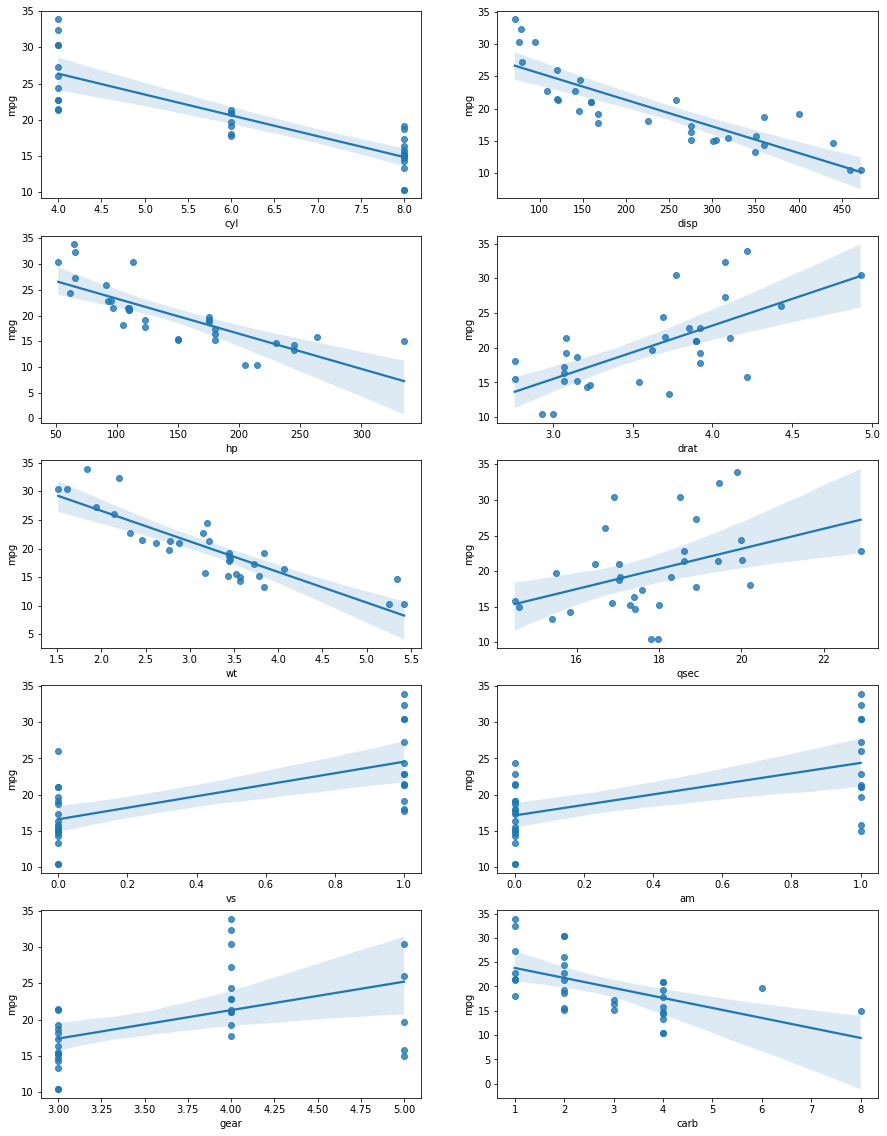

In [13]:
#Scatterplots - MPG vs. Independent Variables

plt.figure(figsize = (15, 20))

cnt = 1
for col in data2.columns:
    if (col == 'mpg'):
        continue
    
    plt.subplot(5, 2, cnt)
    lmgraph = sns.regplot(x = data2[col], y = data2.mpg)
    lmgraph.set_xlabel(col)
    lmgraph.set_ylabel('mpg')
    cnt += 1    

In [14]:
#If Not normal you can use Yeo-Johnson Transformation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

#Load Dataset
dataset_trf=data.drop('model',axis=1)

#Define x and y variable
x_trf=dataset_trf.drop('mpg',axis=1).to_numpy()
y_trf=dataset_trf['mpg'].to_numpy()

#Create Train and Test
from sklearn.model_selection import train_test_split
x_train_trf,x_test_trf,y_train_trf,y_test_trf=train_test_split(x_trf,y_trf,test_size=0.2,random_state=100)

model_trf = Pipeline([
                  ('power',PowerTransformer()),
                  ('scaler',StandardScaler())])

In [15]:
#Create Tranformed Model
for name,model_trf in [('Linear regression', LinearRegression())]: 
    model_trf.fit(x_train_trf,y_train_trf)
    predict = model_trf.predict(x_test_trf)

print('\nTransformed Model - Yeo-Johnson')
print('\nMethod: {}'.format(name)) 

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(model_trf.intercept_)))
print('\n')
coeff_table2=pd.DataFrame(np.transpose(model_trf.coef_),dataset_trf.drop('mpg',axis=1).columns,
                          columns=['Model Coefficients'])
print(coeff_table)
    
#R2 and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test_trf,predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test_trf,predict))*(len(y_trf)-1)/(len(y_trf)-x_trf.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))
print('Root Mean Squared Error: {:0.2f}'.format(np.exp(np.sqrt(metrics.mean_squared_error(y_test_trf, predict))))) 


Transformed Model - Yeo-Johnson

Method: Linear regression

Intercept: -15.78


      Coefficients
cyl       1.938951
disp      1.080770
hp       -0.310827
drat      1.321747
wt       -2.459684
qsec      1.461972
vs       -0.067494
am        0.888064
gear      2.599937
carb     -3.069300

R2: 0.30
Adj_R2: -0.04
Root Mean Squared Error: 73.54


In [16]:
#Feature Selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

def select_featuresCFS(x_train, y_train, x_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(x_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(x_train)
    # transform test input data
    X_test_fs = fs.transform(x_test)
    return X_train_fs, X_test_fs, fs

def select_featuresMI(x_train, y_train, x_test):
    # configure to select all features
    fs2 = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs2.fit(x_train, y_train)
    # transform train input data
    X_train_fs2 = fs2.transform(x_train)
    # transform test input data
    X_test_fs2 = fs2.transform(x_test)
    return X_train_fs2, X_test_fs2, fs2


# feature selection - CFS
X_train_fs, X_test_fs, fs = select_featuresCFS(x_train, y_train, x_test)
fs_table=pd.DataFrame(np.transpose(fs.scores_),data2.drop('mpg',axis=1).columns,
                          columns=['Feature Importance'])
print('Correlaton Feature Selection')
print(fs_table.sort_values(by=['Feature Importance'], ascending=False))

# feature selection - MI
X_train_fs2, X_test_fs2, fs2 = select_featuresMI(x_train, y_train, x_test)
fs_table2=pd.DataFrame(np.transpose(fs2.scores_),data2.drop('mpg',axis=1).columns,
                          columns=['Feature Importance'])
print('\n')
print('Mutual Information Feature Selection')
print(fs_table2.sort_values(by=['Feature Importance'],ascending=True))

Correlaton Feature Selection
      Feature Importance
wt             67.207404
disp           58.372864
cyl            53.036885
hp             33.815342
vs             28.548121
drat           22.440672
am             15.467279
carb           14.484118
gear           11.100221
qsec            7.751590


Mutual Information Feature Selection
      Feature Importance
qsec            0.083852
carb            0.169133
am              0.180006
drat            0.233903
gear            0.270743
vs              0.453460
disp            0.636522
cyl             0.691939
wt              0.712186
hp              0.827490
